In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from numpy.random import randint 
import numpy as np
from qiskit_ibm_provider import IBMProvider

In [2]:

node_qubits_2D = [[0,1], [2,3],[4,5]] # yseful for connection in edge
node_qubit_1D = [ i for i in range (len(node_qubits_2D) * 2) ] # need to somehow remove no_1D variable
edge_qubits = [6,7,8]
a = [9] # ancilla
all_qubits = node_qubit_1D + edge_qubits + a # all qubit list
edge_connections = [[0,1],[0,2],[1,2]] 


In [3]:
def initialization(qr): # qr takes 1D list of qubits of nodes [0,1,2,3,4,5]
    qc.h(qr)
    qc.barrier()
    
def color_check(q0, q1, q2, q3, e):
    
    qc.x([q0,q1,q2,q3])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q0,q1,q2,q3])
    
    
    qc.x([q0,q2])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q0,q2])
    
    qc.x([q1,q3])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q1,q3])
    
    qc.mct([q0,q1,q2,q3], e)
    
    qc.barrier()
    
def color_check_inverse(q0, q1, q2, q3, e):
    
    qc.mct([q0,q1,q2,q3], e)
        
    qc.x([q1,q3])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q1,q3])
            
    qc.x([q0,q2])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q0,q2])
            
        
    qc.x([q0,q1,q2,q3])
    qc.mct([q0,q1,q2,q3], e)
    qc.x([q0,q1,q2,q3])
    
    
    qc.barrier()
    
def nodes_qubits(e): # is the edge connections element 
    '''takes 1 edge connection 1D list and return the qubit accociated with it 1D list
    '''
    return node_qubits_2D[e[0]] + node_qubits_2D[e[1]]
 

def oracle (edge_connections, a): #edge_connections = [[0,1],[0,2],[1,2]]
    '''Parameter :
        edge_connection 2D list of our edge connected with nodes
        a is 1D list of ancillay/ result qubit
    '''
    # initialising the edge qubit 
    qc.x(edge_qubits)
    qc.barrier()
    
    
    #color check function
    for edge_index, e in enumerate(edge_connections):
        qubits = nodes_qubits(e)
        q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
        color_check(q1,q2,q3,q4, edge_index+6) # the constant 6 could be replaced with len(nodes*2 or len(nu of qubits for nodes
        
        
    #phase kickback
    qc.mct(edge_qubits , a[0]) # a index to 0 which is the only one 
    qc.barrier()
    
    
    #inverse effect
        
        # normal solution 
#     for edge_index, e in enumerate(edge_connections):
#         qubits = nodes_qubits(e)
#         q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
#         color_check_inverse(q1,q2,q3,q4, edge_index+6)
        
        #mirror
    
    for  edge_index, e in enumerate(edge_connections[::-1]): # start one
            qubits = nodes_qubits(e)
            q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
            color_check_inverse(q1,q2,q3,q4, len(edge_connections)-edge_index+6-1)
       
    #reinitilize memory 
    qc.x(edge_qubits)
    qc.barrier()
    

#diffucsion operator

    # diffusion at ancilla
    
    
def diffusion_inversion(node_qubit_1D,a):
    initialization(node_qubit_1D)
    qc.x(node_qubit_1D)
    qc.mct(node_qubit_1D, a[0])
    qc.x(node_qubit_1D)
    qc.x(a[0])
    
    initialization(node_qubit_1D)

#diffusion operator

    # diffusion at last node qubit

    
# def diffusion_inversion(node_qubit_1D,a):
#     initialization(node_qubit_1D)
    
#     qc.x(node_qubit_1D)
#     qc.h( node_qubit_1D[-1])
#     qc.mct(node_qubit_1D[:-1], node_qubit_1D[-1])
#     qc.h( node_qubit_1D[-1])
#     qc.x(node_qubit_1D)
    
    
#     initialization(node_qubit_1D)
    

    
    

    

In [4]:
#main program 

In [5]:
no_of_qubits = len(all_qubits)
no_of_bits = len(node_qubit_1D)

#creating a circuit
qc = QuantumCircuit(no_of_qubits, no_of_bits)

#initializing the state)
initialization(node_qubit_1D


# ancilla in \-> state
qc.h(a[0])
qc.x(a[0])
qc.barrier()


for i in range(1):
    oracle(edge_connections, a)
    diffusion_inversion(node_qubit_1D, a)
    

#ancial in /-> state

qc.h(a[0])
qc.x(a[0])
qc.barrier()





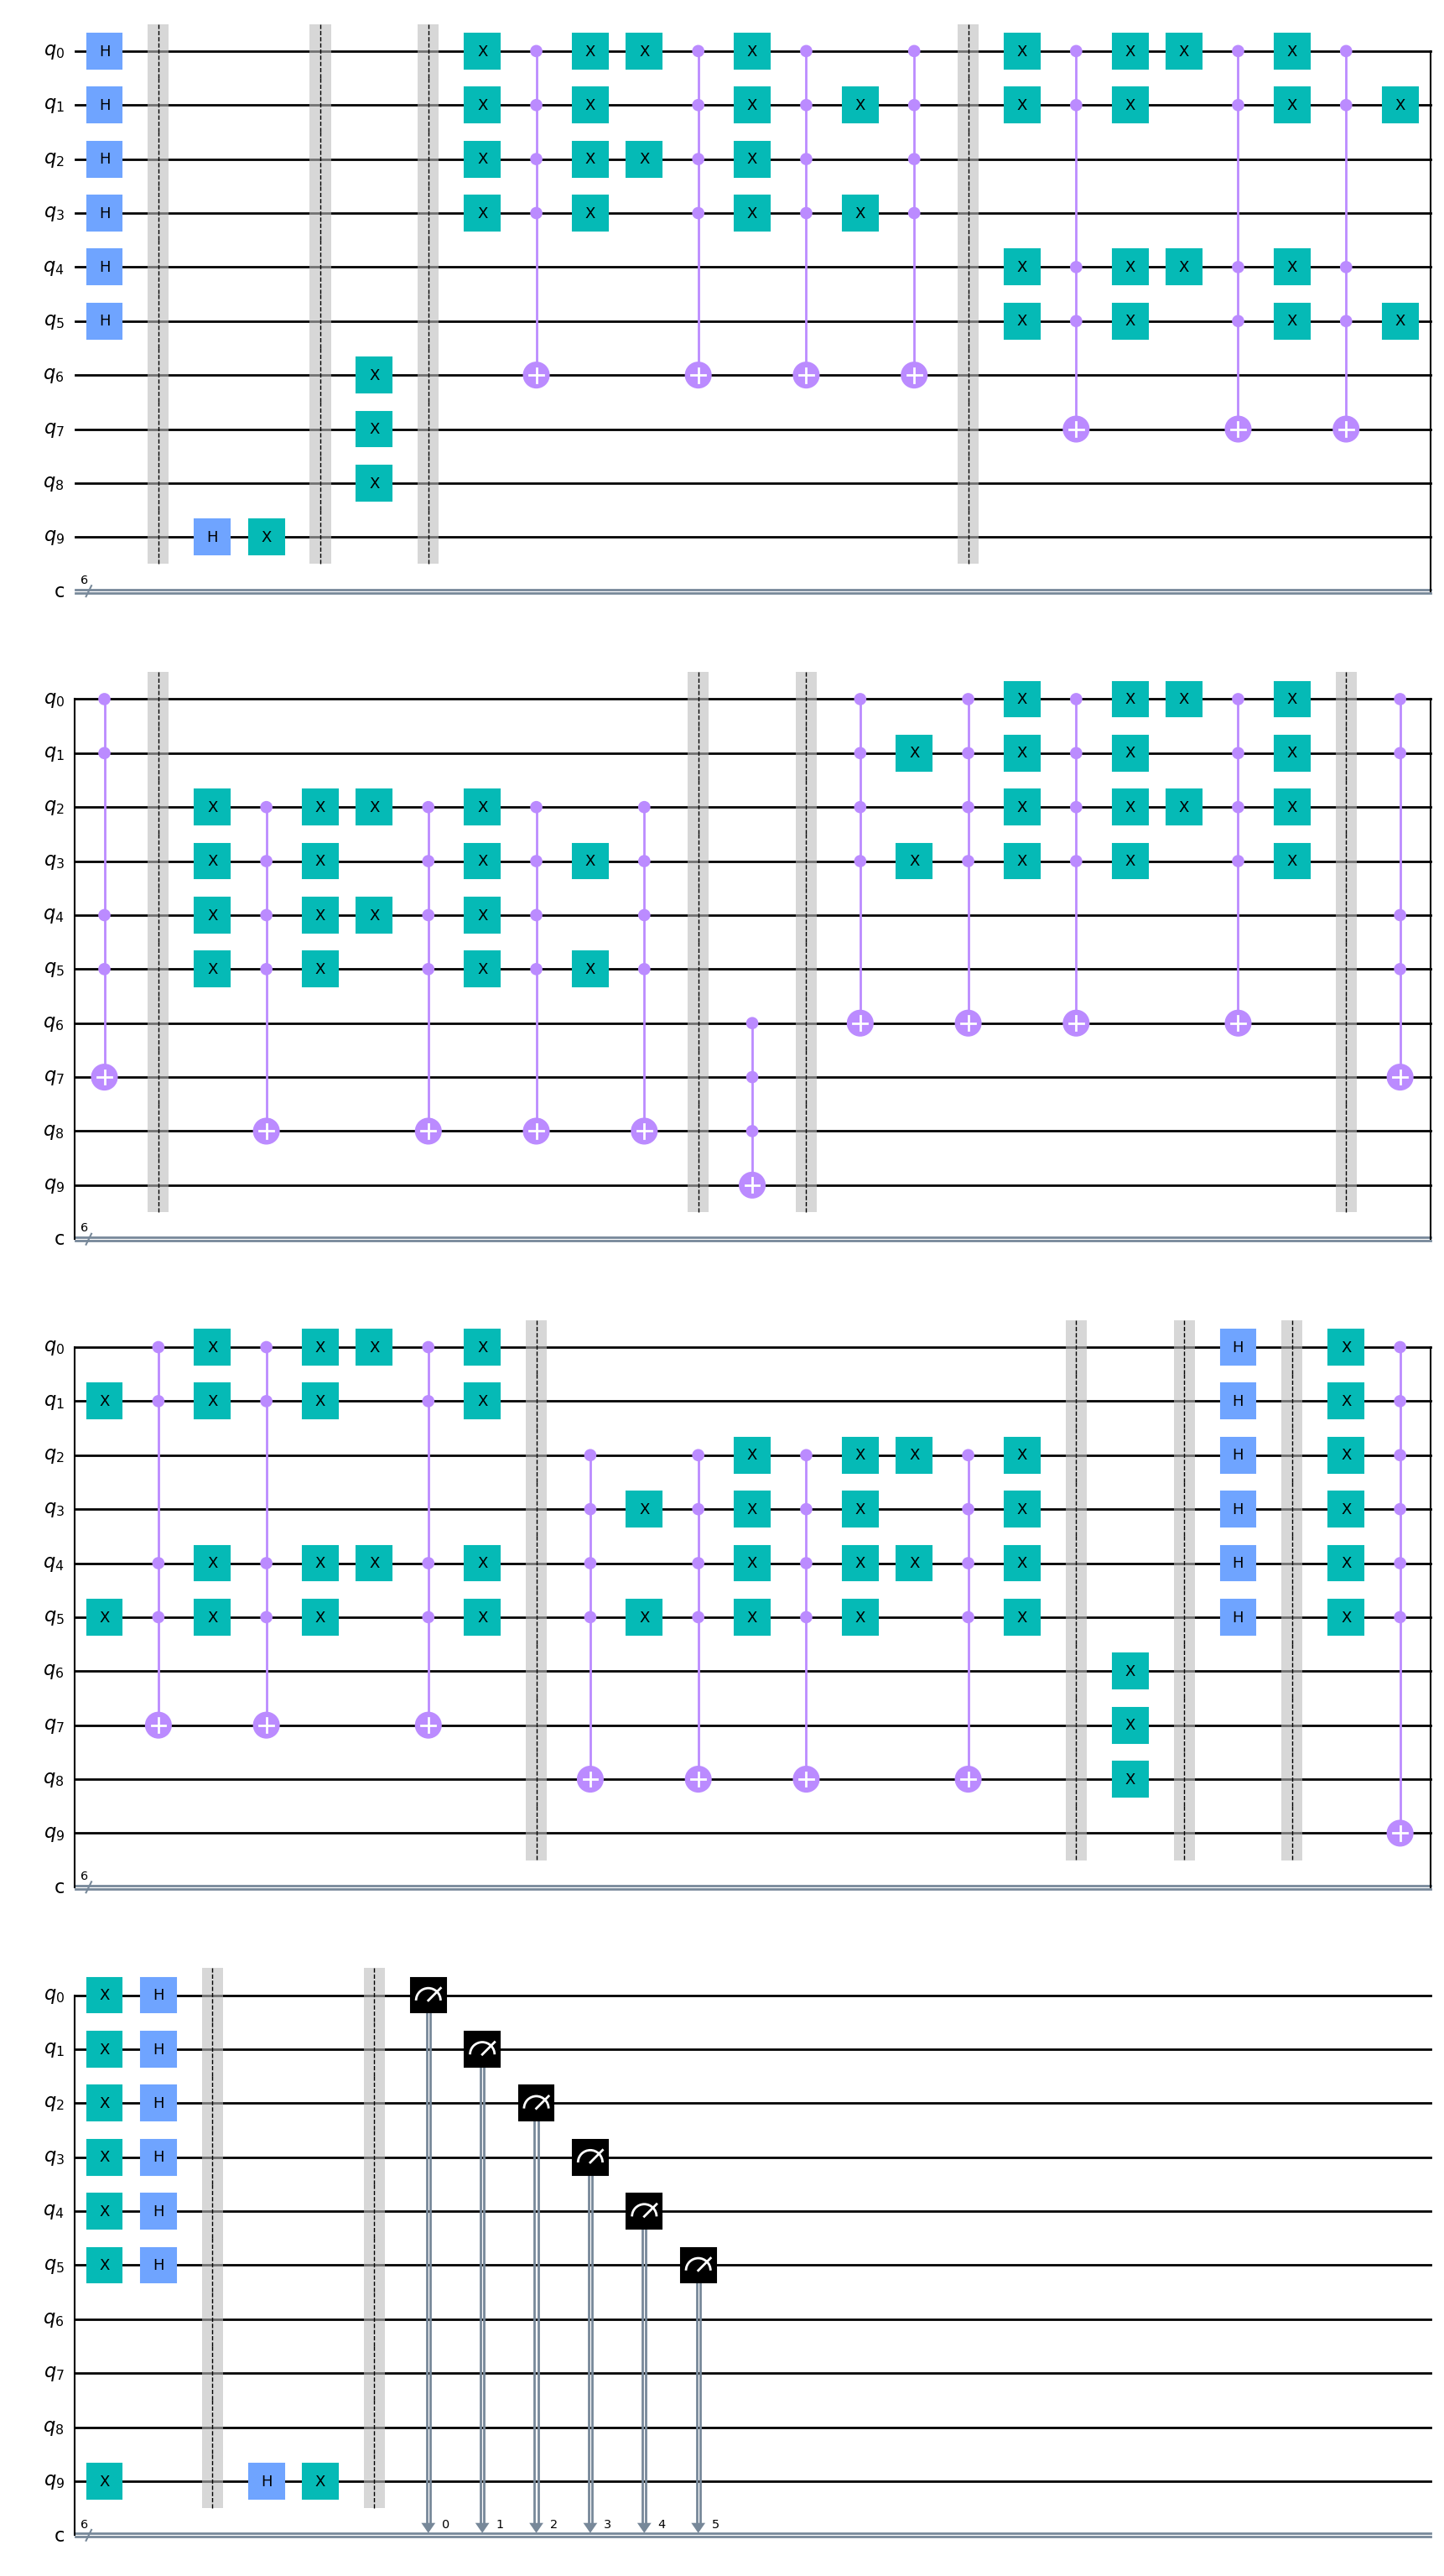

In [6]:
qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
qc.draw()

In [7]:
# from qiskit_ibm_provider import IBMProvider


# provider = IBMProvider()
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=10000, seed_simulator=12345)
# result = job.result()
# count = result.get_counts()



In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=10000)
result = job.result()
count = result.get_counts()

In [9]:
count

{'100101': 152,
 '101010': 147,
 '001100': 193,
 '101110': 150,
 '001111': 148,
 '101100': 153,
 '110111': 146,
 '100100': 153,
 '010000': 141,
 '111100': 159,
 '100011': 153,
 '110110': 141,
 '110101': 175,
 '000010': 153,
 '010100': 158,
 '010111': 160,
 '000111': 155,
 '000011': 178,
 '100110': 140,
 '100000': 177,
 '010011': 158,
 '111101': 146,
 '001000': 162,
 '001010': 158,
 '111001': 131,
 '110001': 170,
 '111000': 160,
 '100010': 165,
 '000000': 167,
 '011110': 157,
 '110011': 164,
 '000101': 180,
 '001101': 146,
 '011001': 148,
 '101000': 152,
 '101101': 164,
 '010010': 165,
 '111111': 155,
 '110100': 149,
 '010110': 149,
 '111110': 151,
 '000110': 137,
 '010001': 143,
 '111010': 160,
 '001110': 154,
 '001001': 144,
 '111011': 169,
 '001011': 162,
 '011000': 177,
 '110000': 149,
 '011010': 140,
 '000001': 144,
 '011101': 151,
 '101011': 168,
 '011011': 180,
 '000100': 161,
 '100111': 164,
 '011111': 164,
 '011100': 153,
 '110010': 149,
 '101001': 148,
 '101111': 143,
 '100001

In [13]:
#sort count
count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

# collect answers with Top 9 probabilities
ans_list = count_sorted[0:9]
low_list = count_sorted[:-1]

low_list

[('001100', 193),
 ('000101', 180),
 ('011011', 180),
 ('000011', 178),
 ('100000', 177),
 ('011000', 177),
 ('110101', 175),
 ('110001', 170),
 ('111011', 169),
 ('101011', 168),
 ('000000', 167),
 ('100010', 165),
 ('010010', 165),
 ('110011', 164),
 ('101101', 164),
 ('100111', 164),
 ('011111', 164),
 ('001000', 162),
 ('001011', 162),
 ('000100', 161),
 ('010111', 160),
 ('111000', 160),
 ('111010', 160),
 ('111100', 159),
 ('100001', 159),
 ('010100', 158),
 ('010011', 158),
 ('001010', 158),
 ('011110', 157),
 ('000111', 155),
 ('111111', 155),
 ('001110', 154),
 ('101100', 153),
 ('100100', 153),
 ('100011', 153),
 ('000010', 153),
 ('011100', 153),
 ('100101', 152),
 ('101000', 152),
 ('010101', 152),
 ('111110', 151),
 ('011101', 151),
 ('101110', 150),
 ('110100', 149),
 ('010110', 149),
 ('110000', 149),
 ('110010', 149),
 ('001111', 148),
 ('011001', 148),
 ('101001', 148),
 ('101010', 147),
 ('110111', 146),
 ('111101', 146),
 ('001101', 146),
 ('001001', 144),
 ('000001'